Install necessary libraries

In [2]:
!pip install matplotlib scikit-learn scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

Generate synthetic data

In [5]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

Fit K-means model

In [6]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Fit K-medoids model

In [7]:
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(X)
y_kmedoids = kmedoids.predict(X)

Create a side-by-side visualization for K-means and K-medoids

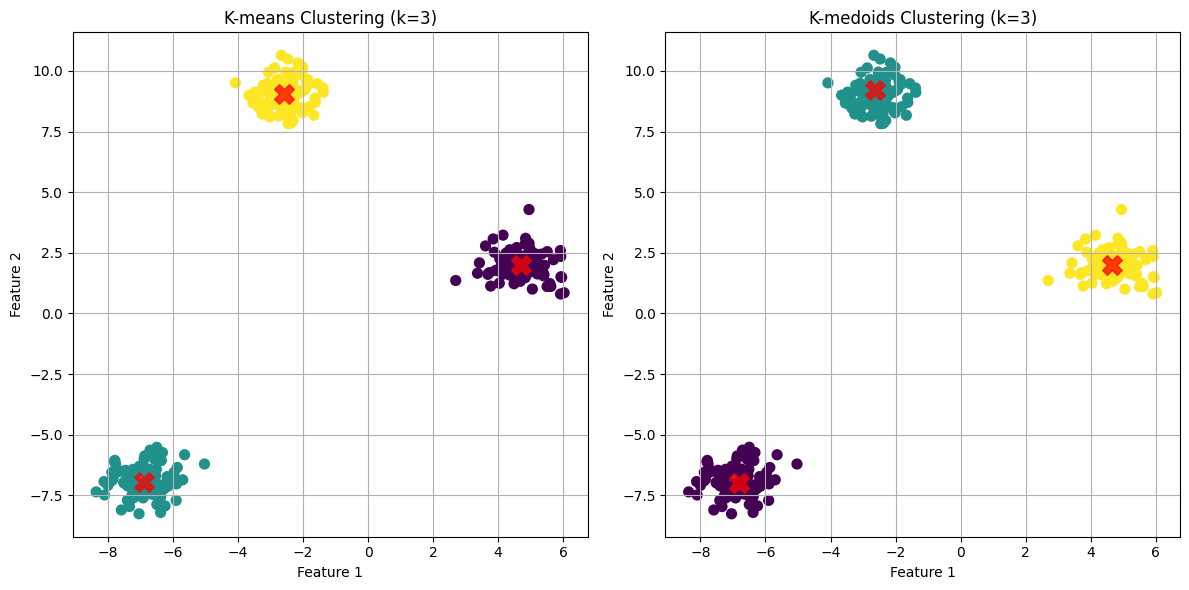

In [8]:
plt.figure(figsize=(12, 6))

# K-means plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers_kmeans = kmeans.cluster_centers_
plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark K-means centers
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

# K-medoids plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmedoids, s=50, cmap='viridis')
centers_kmedoids = X[kmedoids.medoid_indices_]
plt.scatter(centers_kmedoids[:, 0], centers_kmedoids[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark K-medoids centers
plt.title('K-medoids Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Calculate essential metrics for evaluation

In [9]:
# Inertia for K-means
inertia_value = kmeans.inertia_  # Sum of squared distances to closest centroid

# Silhouette Score for K-means
silhouette_avg_kmeans = silhouette_score(X, y_kmeans)

# Silhouette Score for K-medoids
silhouette_avg_kmedoids = silhouette_score(X, y_kmedoids)

# Print the metrics
print(f"K-means Inertia: {inertia_value:.2f}")
print(f"K-means Silhouette Score: {silhouette_avg_kmeans:.2f}")
print(f"K-medoids Silhouette Score: {silhouette_avg_kmedoids:.2f}")

K-means Inertia: 204.07
K-means Silhouette Score: 0.91
K-medoids Silhouette Score: 0.91
